In [1]:
# Import python packages

from glob import glob
import numpy as np
from tqdm import tqdm

from matplotlib import pyplot as plt

In [2]:
# Define data loader

def load(f):
    d = np.fromfile(f, dtype='float32')
    n = d.shape[0] // 6
    if n * 6 != d.shape[0]:
        raise Exception("Unexpected file size.")
    return d.reshape((n,2,3))

In [3]:
# Load all data at once and construct a large numpy array

S = np.array([load(f) for f in sorted(glob('*.raw'))])
X = S[:,:,0,:]
V = S[:,:,1,:]

(-0.5, 0.5)

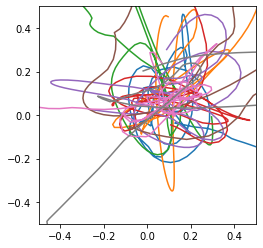

In [4]:
# Plot the orbits of the first 8 particles

for i in range(8):
    plt.plot(X[:,i,0], X[:,i,1])

plt.gca().set_aspect('equal')
plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)

In [5]:
# Create scatter plots so they can be converted into a movie

for f in tqdm(sorted(glob('*.raw'))):
    x = load(f)[:,0,:]
    
    fig, ax = plt.subplots(1, figsize=(8,8))
    ax.scatter(x[:,0],x[:,1])
    ax.set_aspect('equal')
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    fig.savefig(f.replace('raw','png'))
    plt.close(fig)

100%|█████████████████████████████████████████████████████████████████████████████████████████| 129/129 [00:08<00:00, 14.37it/s]
